In [1]:
# Mohammad Hossein Zehtab
# Machine-Learning-Fridays
# Iris_Multiclass_Classification_Project

# Importing Libraries

In [62]:
# Importing preliminary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Importing Sklearn tools and algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Reading Iris Dataset

In [3]:
# Reading iris dataset
iris = pd.read_csv("Iris_Data.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Copying iris dataset into df
df = iris.copy()
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
148,6.2,3.4,5.4,2.3,Iris-virginica
29,4.7,3.2,1.6,0.2,Iris-setosa
79,5.7,2.6,3.5,1.0,Iris-versicolor


In [5]:
# Getting dataframe shape
df.shape

(150, 5)

# Cleaning Iris Dataset

## Iris DataFrame Information

In [6]:
# Replacing species name to more brief name
df1 = df.replace({"Iris-setosa":"setosa", "Iris-virginica":"virginica", "Iris-versicolor":"versicolor"})
df1.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
40,5.0,3.5,1.3,0.3,setosa
114,5.8,2.8,5.1,2.4,virginica
92,5.8,2.6,4.0,1.2,versicolor
95,5.7,3.0,4.2,1.2,versicolor
77,6.7,3.0,5.0,1.7,versicolor


In [7]:
# Checking dataframe info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Handling Missing Values

In [8]:
# Checking for missing values
df1.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Insight**
- There is no missing value.

## Handling Duplicated Rows

In [9]:
# Checking for duplicates
df1.duplicated().any()

True

In [10]:
# Getting duplicate rows
mask = df1.duplicated()
duplicate_rows = df1.query("@mask == True")
duplicate_rows

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


In [11]:
# Dropping duplicate rows
df2 = df1.drop_duplicates()
df2.shape

(147, 5)

## Handling Outliers

### Plotting Box Plots

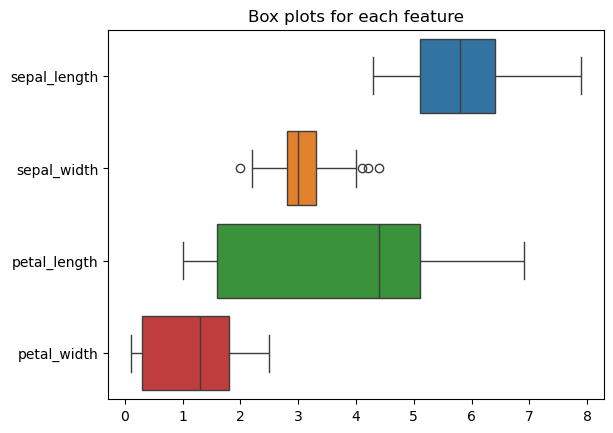

In [12]:
# Box plots for each feature as a general view
plt.title("Box plots for each feature")
sns.boxplot(data=df2.iloc[:, :4], orient="h")
plt.show()

### Outlier Detection Using Zscore

In [13]:
# Turning feature values into zscore values
zscores = [stats.zscore(df2[feature]) for feature in df2.columns[:4]]
len(zscores), type(zscores)

(4, list)

In [14]:
# Outliers for each feature using zscore
outlier_sepal_length = df2[np.abs(zscores[0] > 3)]
outlier_sepal_width = df2[np.abs(zscores[1] > 3)]
outlier_petal_length = df2[np.abs(zscores[2] > 3)]
outlier_petal_width = df2[np.abs(zscores[3] > 3)]
outlier_indices_using_zscore = pd.concat([outlier_sepal_length, outlier_sepal_width,
                             outlier_petal_length, outlier_petal_width], axis=0)
outlier_indices_using_zscore

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa


**Insight**
- Using zscore, there is one outlier with the index of 15 for 'sepal_width'.

### Outlier Detection Using 3*Sigma Based on Normal Distribution

In [15]:
# Outlier indices using 3*sigma based on normal distribution
def find_outlier_index_using_3sigma(dataframe) -> list:
    '''
    Finding outlier indices using 3*sigma based on normal distribution.
    '''
    features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
    labels = ["setosa", "versicolor", "virginica"]

    outlier_index_3sigma = list()
    for feature in features:
        for label in labels:
            df_specy = dataframe.query("species == @label")
            selected_column = df_specy[feature]
            
            mu = selected_column.mean()
            sigma = selected_column.std()
            lower_limit = mu - 3 * sigma
            upper_limit = mu + 3 * sigma
            
            mask = (selected_column < lower_limit)|(selected_column > upper_limit)
            outliers = selected_column[mask]
            outlier_indices = outliers.index
            # print(outlier_indices)    Debugging
            
            if len(outlier_indices) == 0: continue
            print(f"{feature:15},\t{label:15},\t outlier indices={outlier_indices.values}")
            outlier_index_3sigma.extend(outlier_indices)
            
    return outlier_index_3sigma

### Driver Code ###
outlier_indices_using_3sigma = find_outlier_index_using_3sigma(df2)
print("\nOutlier indices using 3sigma:")
outlier_indices_using_3sigma

petal_width    ,	setosa         ,	 outlier indices=[43]

Outlier indices using 3sigma:


[43]

### Outlier Detection Using IQR

In [16]:
# Outlier indices using iqr
def find_outlier_index_using_iqr(dataframe) -> list:
    '''
    Finding outlier indices using iqr.
    '''
    features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
    labels = ["setosa", "versicolor", "virginica"]

    outlier_index_iqr = list()
    for feature in features:
        for label in labels:
            df_specy = dataframe.query("species == @label")
            selected_column = df_specy[feature]
            
            q1 = selected_column.quantile(0.25)    # First quartile
            q3 = selected_column.quantile(0.75)    # Third quartile
            iqr = q3 - q1
            lower_limit = q1 - 1.5 * iqr
            upper_limit = q3 + 1.5 * iqr
            
            mask = (selected_column < lower_limit)|(selected_column > upper_limit)
            outliers = selected_column[mask]
            outlier_indices = outliers.index
            
            if len(outlier_indices) == 0: continue
            print(f"{feature:15},\t{label:15},\t outlier indices={outlier_indices.values}")
            outlier_index_iqr.extend(outlier_indices)
            
    return outlier_index_iqr

### Driver Code ###
outlier_indices_using_iqr = find_outlier_index_using_iqr(df2)
print("\nOutlier indices using iqr:")
outlier_indices_using_iqr

sepal_length   ,	virginica      ,	 outlier indices=[106 131]
sepal_width    ,	setosa         ,	 outlier indices=[41]
petal_length   ,	setosa         ,	 outlier indices=[22]
petal_length   ,	versicolor     ,	 outlier indices=[98]
petal_width    ,	setosa         ,	 outlier indices=[23 43]

Outlier indices using iqr:


[106, 131, 41, 22, 98, 23, 43]

### Dropping Common Outliers

In [17]:
# Turning outlier list into set and obtaining intersection of the sets
final_outlier_indices = set(outlier_indices_using_3sigma) & set(outlier_indices_using_iqr) & set(outlier_indices_using_zscore.index)
print("Final outlier indices:")
final_outlier_indices

Final outlier indices:


set()

**Insight**
- The data has no outliers.

# Scaling Data

In [18]:
# Scaling data using standard scaler
standard_scaler = StandardScaler()
feature_column_list = df2.columns[:4].tolist()
scaled_array = standard_scaler.fit_transform(df2[feature_column_list])
df2[feature_column_list] = scaled_array
df2.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
55,-0.189359,-0.587304,0.410542,0.120690,versicolor
125,1.626017,0.331139,1.266160,0.782686,virginica
135,2.231143,-0.128082,1.323202,1.444682,virginica
59,-0.794484,-0.816914,0.068294,0.253089,versicolor
104,0.778842,-0.128082,1.152078,1.312282,virginica
62,0.173716,-1.964968,0.125336,-0.276507,versicolor
50,1.383967,0.331139,0.524624,0.253089,versicolor
106,-1.157560,-1.276136,0.410542,0.650287,virginica
28,-0.794484,0.790361,-1.357737,-1.335700,setosa
39,-0.915509,0.790361,-1.300696,-1.335700,setosa


## Spliting Data into Train and Test Datasetes

In [19]:
# Creating clean dataframe
df_clean = df2.copy()
df_clean.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,1.020892,-0.128082,0.809831,1.444682,virginica
146,0.536792,-1.276136,0.695748,0.915085,virginica
147,0.778842,-0.128082,0.809831,1.047484,virginica
148,0.415766,0.790361,0.923913,1.444682,virginica
149,0.052691,-0.128082,0.752789,0.782686,virginica


In [20]:
# Create feature matrix X and target vector y
X = df_clean.iloc[:, :4]
y = df_clean.iloc[:, 4]

print('X Dimension = ', X.shape)
print('y Dimension = ', y.shape)

X Dimension =  (147, 4)
y Dimension =  (147,)


In [21]:
# Convert X and y to numpy array for easier computations
X = X.to_numpy()
y = y.to_numpy()

In [22]:
# Get 1st five row of the X
X[:5]

array([[-0.91550949,  1.0199714 , -1.35773692, -1.33570001],
       [-1.15755966, -0.12808217, -1.35773692, -1.33570001],
       [-1.39960983,  0.33113926, -1.41477817, -1.33570001],
       [-1.52063491,  0.10152855, -1.30069567, -1.33570001],
       [-1.03653457,  1.24958212, -1.35773692, -1.33570001]])

In [23]:
# Get 1st five row of the y
y[:5]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

In [24]:
# Spliting data to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dimension = ", X_train.shape)
print("X_test dimension = ", X_test.shape)
print("y_train dimension = ", y_train.shape)
print("y_test dimension = ", y_test.shape)

X_train dimension =  (117, 4)
X_test dimension =  (30, 4)
y_train dimension =  (117,)
y_test dimension =  (30,)


# Building Multiclass Logistic Regression Model Using OVR

## Creating Logistic Regression Model

In [25]:
# Creating logistic regression object
logistic_regression = LogisticRegression(multi_class="ovr", solver="liblinear")

In [26]:
# Fitting logistic regression object on train dataset
logistic_regression.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

## Testing Model on a New Data

In [27]:
# Testing model on the 19th index of test dataset
index = 19
actual_specy = y_test[index]
predicted_specy = logistic_regression.predict([X_test[index]])
print(f"Actual specy of the data with index of {index} is: {actual_specy}")
print(f"Predicted specy of the data with index of {index} is: {predicted_specy[0]}")

Actual specy of the data with index of 19 is: setosa
Predicted specy of the data with index of 19 is: setosa


## Calculating Model Score

In [28]:
# Accuracy Score
print(f"Accuracy score of the model is: {logistic_regression.score(X_test, y_test) * 100:.3f}")

Accuracy score of the model is: 90.000


## Creating Confusion Matrix

In [29]:
# Confusion matrix
y_pred = logistic_regression.predict(X_test)
y_true = y_test

confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

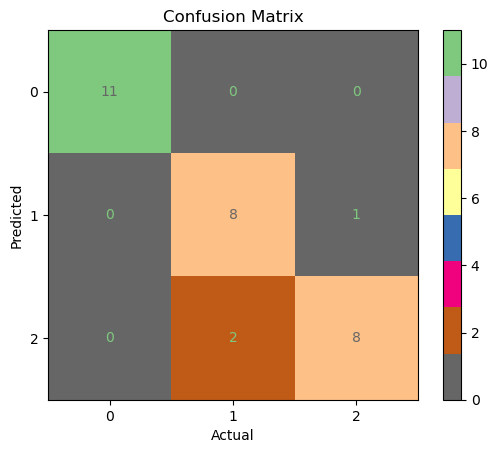

In [30]:
# Styling confusion matrix
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix.T)
display.plot(cmap=plt.cm.Accent_r)
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## Classification Report

In [31]:
# Classification report
report = metrics.classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.89      0.80      0.84        10
   virginica       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



**Conclusion**

The binary logistic regression classification model with the accuracy score of 90% works PERFECTLY!

# Building Multiclass Neural Network Model Using MLP

## Creating MLP Model

In [32]:
# Creating 'mlpclassifier' object
mlp = MLPClassifier(hidden_layer_sizes=(6),
                    activation="relu",
                    solver="sgd",
                    learning_rate_init=0.1,
                    max_iter=100,
                    random_state=42)

In [33]:
# Fitting 'mlp' on train data
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=6, learning_rate_init=0.1, max_iter=100,
              random_state=42, solver='sgd')

## Testing MLP Model on New Data

In [34]:
# Mlp prediction on test data
y_pred_mlp = mlp.predict(X_test)

In [35]:
# Testing mlp model on the 5th index of test dataset
index_mlp = 5
actual_specy_mlp = y_test[index_mlp]
predicted_specy_mlp = y_pred_mlp[index_mlp]
print(f"Actual specy of the data with index of {index_mlp} is: {actual_specy_mlp}")
print(f"Predicted specy of the data with index of {index_mlp} is: {predicted_specy_mlp}")

Actual specy of the data with index of 5 is: setosa
Predicted specy of the data with index of 5 is: setosa


## Calculating MLP Model Score

In [36]:
# Accuracy Score for mlp model
print(f"Accuracy score of the mlp model is: {metrics.accuracy_score(y_true, y_pred_mlp) * 100:.3f}")

Accuracy score of the mlp model is: 96.667


## Plotting Epochs vs Loss Curve for the MLP Model

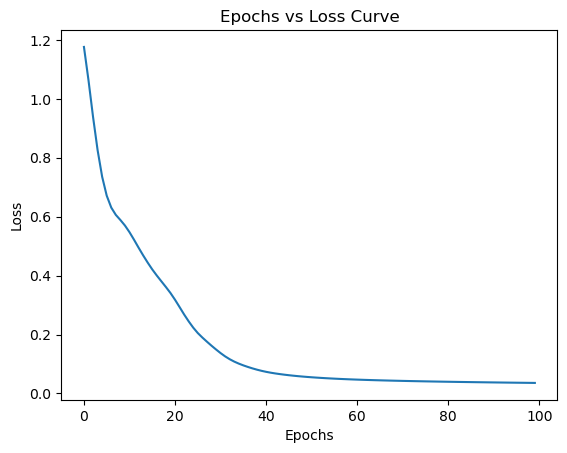

In [37]:
# Plotting epochs vs loss curve
plt.plot(mlp.loss_curve_)
plt.title("Epochs vs Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Creating Confusion Matrix for the MLP Model

In [38]:
# Confusion matrix for mlp model
y_true_mlp = y_test

confusion_matrix_mlp = metrics.confusion_matrix(y_true_mlp, y_pred_mlp)

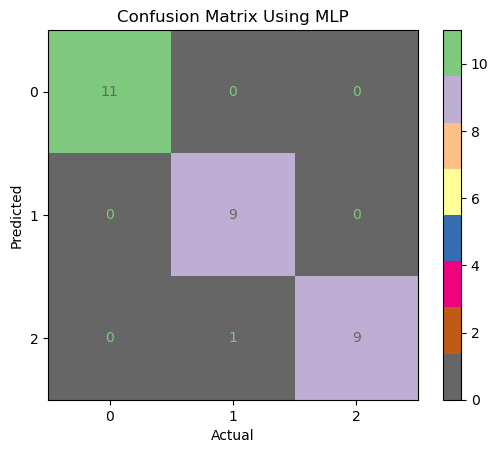

In [39]:
# Styling confusion matrix for mlp model
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_mlp.T)
display.plot(cmap=plt.cm.Accent_r)
plt.title("Confusion Matrix Using MLP")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## MLP Classification Report

In [40]:
# Classification report for mlp model
report_mlp = metrics.classification_report(y_true_mlp, y_pred_mlp)
print(report_mlp)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.90      0.95        10
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



**Conclusion**

The multiclass neural network model using mlp with the accuracy score of 97% works PERFECTLY!

# Building KNN Classification Model

## Creating KNN Model

In [69]:
# Creating 'KNeighborsClassifier' object
knn = KNeighborsClassifier(n_neighbors=9)

In [70]:
# Fitting 'knn' on the train data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

## Testing KNN Model on New Data

In [71]:
# Knn prediction on test data
y_pred_knn = knn.predict(X_test)

In [72]:
# Testing knn model on the 22nd index of test dataset
index_knn = 22
actual_specy_knn = y_test[index_knn]
predicted_specy_knn = y_pred_mlp[index_knn]
print(f"Actual specy of the data with index of {index_knn} is: {actual_specy_knn}")
print(f"Predicted specy of the data with index of {index_knn} is: {predicted_specy_knn}")

Actual specy of the data with index of 22 is: setosa
Predicted specy of the data with index of 22 is: setosa


## Calculating KNN Model Score

In [73]:
# Accuracy Score for knn model
y_true_knn = y_test
print(f"Accuracy score of the knn model is: {metrics.accuracy_score(y_true_knn, y_pred_knn) * 100:.3f}")

Accuracy score of the knn model is: 93.333


## Optimizing Hyper Parameter of k using K-Fold Cross Validation for KNN Model

In [63]:
# Creating list of odd Ks
k_list = list(range(1, 50, 2))
cv_scores = []

# Performing 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    cv_scores.append(scores.mean())

In [65]:
# Finding best k
the_best_k = k_list[cv_scores.index(max(cv_scores))]
print("The Optimal Number of Neighbors is %d." % the_best_k)

The Optimal Number of Neighbors is 9.


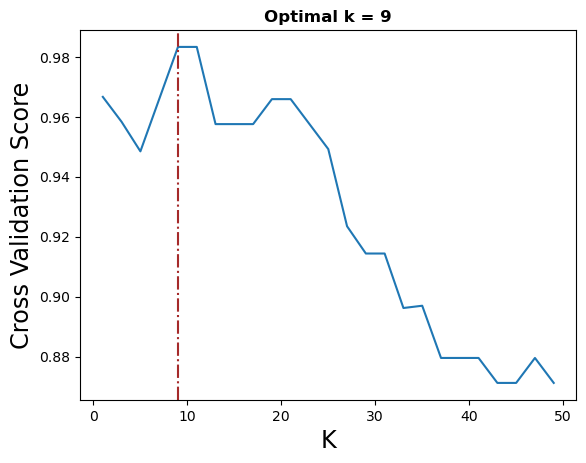

In [68]:
# Plotting k vs cross validation scores
plt.plot(k_list, cv_scores)
plt.title(f"Optimal k = {the_best_k}", weight="bold")
plt.xlabel("K", size="xx-large")
plt.ylabel("Cross Validation Score", size="xx-large")
plt.axvline(x=the_best_k, color="brown", ls="-.")
plt.show()

**Insight**

So we go back again and train the model based on k=9 and get a new score.

## Creating Confusion Matrix for the KNN Model

In [74]:
# Confusion matrix for knn model
confusion_matrix_knn = metrics.confusion_matrix(y_true_knn, y_pred_knn)

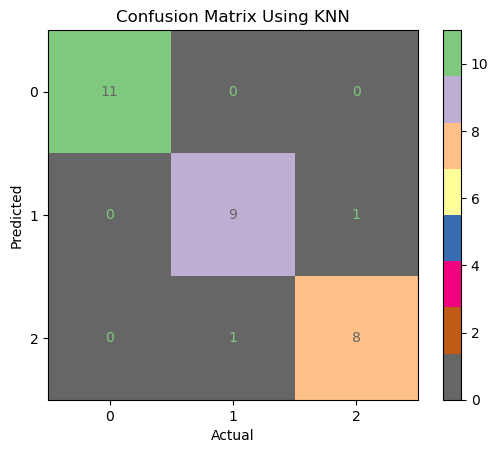

In [75]:
# Styling confusion matrix for knn model
display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn.T)
display.plot(cmap=plt.cm.Accent_r)
plt.title("Confusion Matrix Using KNN")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## KNN Classification Report

In [76]:
# Classification report for knn model
report_knn = metrics.classification_report(y_true_knn, y_pred_knn)
print(report_knn)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



**Conclusion**

The KNN classification model with the accuracy score of 93% works PERFECTLY!

# Final Conclusion

After applying 3 method of classification, the accuracy score results are as follows:
- The accuracy score of binary logistic regression classification model is 90%.
- The accuracy score of multiclass neural network model using mlp is 97%.
- The accuracy score of KNN classification model is 93%.

So to conclude, `the multiclass neural network model using mlp` has the best performance for training of Iris dataset.